In [17]:
import netCDF4 as nc
import numpy as np
import pandas as pd

# Monthly Soil moisture (mm3/mm3) of California from 2017-2018 (24 months)

In [18]:
soil_moisture = []
for month in range(1, 10):
    f = nc.Dataset("/Users/silent/Documents/MCM_works/Competition/Data/2017_sm/ESACCI-SOILMOISTURE-L3S-SSMV-COMBINED-20170"+str(month)+"01000000-fv04.5.nc")
    all_vars = f.variables.keys()   # get all keys
    all_vars_info = f.variables.items()   # output: <class 'dict_items'>
    sm = f['sm'][:].data
    soil_moisture.append(sm[0][193][249])
for month in range(10, 13):
    f = nc.Dataset("/Users/silent/Documents/MCM_works/Competition/Data/2017_sm/ESACCI-SOILMOISTURE-L3S-SSMV-COMBINED-2017"+str(month)+"01000000-fv04.5.nc")
    all_vars = f.variables.keys()   # get all keys
    all_vars_info = f.variables.items()   # output: <class 'dict_items'>
    sm = f['sm'][:].data
    soil_moisture.append(sm[0][193][249])
for month in range(1, 10):
    f = nc.Dataset("/Users/silent/Documents/MCM_works/Competition/Data/2018_sm/ESACCI-SOILMOISTURE-L3S-SSMV-COMBINED-20180"+str(month)+"01000000-fv04.5.nc")
    all_vars = f.variables.keys()   # get all keys
    all_vars_info = f.variables.items()   # output: <class 'dict_items'>
    sm = f['sm'][:].data
    processed_data = 0
    if(sm[0][193][249] == -9999.):
        _ = 0
        for j in range (-15, 15):
            if(sm[0][193][249+j] != -9999.):
                if(_ == 0):
                    _ = sm[0][193][249+j]
                else:
                    _ = (sm[0][193][249+j] + _)/2
        processed_data = _
    if(sm[0][193][249] != -9999.):
        soil_moisture.append(sm[0][193][249])
    else:
        soil_moisture.append(processed_data)
for month in range(10, 13):
    f = nc.Dataset("/Users/silent/Documents/MCM_works/Competition/Data/2018_sm/ESACCI-SOILMOISTURE-L3S-SSMV-COMBINED-2018"+str(month)+"01000000-fv04.5.nc")
    all_vars = f.variables.keys()   # get all keys
    all_vars_info = f.variables.items()   # output: <class 'dict_items'>
    sm = f['sm'][:].data
    processed_data = 0
    if(sm[0][193][249] == -9999.):
        _ = 0
        for j in range (-15, 15):
            if(sm[0][193][249+j] != -9999.):
                if(_ == 0):
                    _ = sm[0][193][249+j]
                else:
                    _ = (sm[0][193][249+j] + _)/2
        processed_data = _
    if(sm[0][193][249] != -9999.):
        soil_moisture.append(sm[0][193][249])
    else:
        soil_moisture.append(processed_data)
for index, data in enumerate(soil_moisture):
    if(data == 0):
        data = (soil_moisture[index-1] + soil_moisture[index+1])/2
        soil_moisture[index] = data
print(soil_moisture)

[0.24582867, 0.26577717, 0.26728067, 0.26728737, 0.24231267, 0.146871, 0.14026248, 0.12776254, 0.11213975, 0.15040728, 0.15875389, 0.24747427, 0.21590715646743774, 0.23874135, 0.23361720144748688, 0.22849305, 0.21192941, 0.19964428, 0.101666465, 0.1041939, 0.09674478, 0.1386405, 0.21872484564420347, 0.22324495]


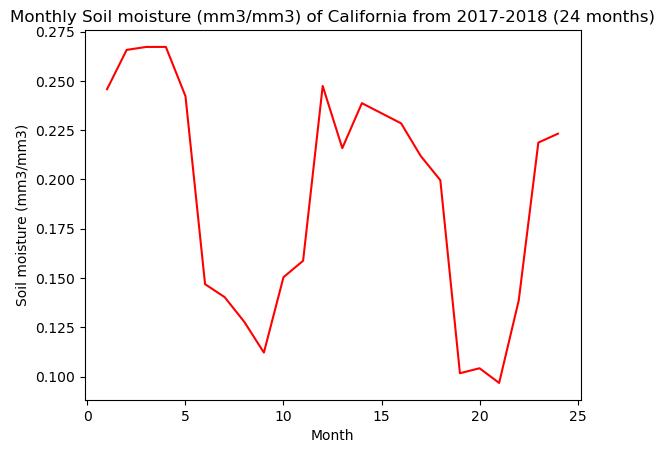

In [19]:
import matplotlib.pyplot as plt
month = np.arange(1, 25, 1)
plt.title("Monthly Soil moisture (mm3/mm3) of California from 2017-2018 (24 months)")
plt.xlabel("Month")
plt.ylabel("Soil moisture (mm3/mm3)")
plt.plot(month, soil_moisture, 'r')

In [20]:
air_pressure_california = pd.DataFrame(pd.read_csv("/Users/silent/Documents/MCM_works/Competition/Data/California_data/AirPressure.csv"))
air_pressure_list = air_pressure_california.values[0].tolist() + air_pressure_california.values[1].tolist()
rainfall_california = pd.DataFrame(pd.read_csv("/Users/silent/Documents/MCM_works/Competition/Data/California_data/ObservedRainfall.csv"))
rainfall_list = rainfall_california.values[0].tolist() + rainfall_california.values[1].tolist()
temperature_california = pd.DataFrame(pd.read_csv("/Users/silent/Documents/MCM_works/Competition/Data/California_data/Temperature.csv"))
temperature_list = temperature_california.values[0].tolist() + temperature_california.values[1].tolist()
rainfall_list[11] = (rainfall_list[12] + rainfall_list[10])/2
rainfall_list[13] = (rainfall_list[12] + rainfall_list[14])/1.5
rainfall_list[-1] = (rainfall_list[-2])*1.5
rainfall_list[0], rainfall_list[1] = rainfall_list[1], rainfall_list[0]
rainfall_list[0], rainfall_list[2] = rainfall_list[2], rainfall_list[0]
rainfall_list[3] = (rainfall_list[2] + rainfall_list[4])/2
for i in range(4, 11):
    rainfall_list[i] = (rainfall_list[i-1] + rainfall_list[i+1])/2 
for i in range(16, 22):
    rainfall_list[i] = (rainfall_list[i-1] + rainfall_list[i+1])/2 
print(rainfall_list)

[2.663870968, 11.26233333, 10.1072, 5.395212903, 2.811535023, 1.430928802, 0.765964401, 0.535724136, 0.474586206, 1.3774543935, 2.34913042275, 3.3208064520000002, 4.361290323, 6.996344086000001, 6.133225806, 1.707096774, 0.8983817205, 0.47608741174999997, 0.242377039375, 0.1466885196875, 0.39006839784374997, 1.809367532421875, 3.228666667, 4.8430000005]


/var/folders/hs/hk_yx7yd6g1dvcsdd3rksqk40000gn/T/ipykernel_19867/3429190364.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(1.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(month, air_pressure_list, 'r', marker='.', c='r', ms=5, linewidth='1', label="Air pressure")
/var/folders/hs/hk_yx7yd6g1dvcsdd3rksqk40000gn/T/ipykernel_19867/3429190364.py:18: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(1.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(month, temperature_list, "r", marker='.', c='g', ms=5, linewidth='1', label="Temperature")


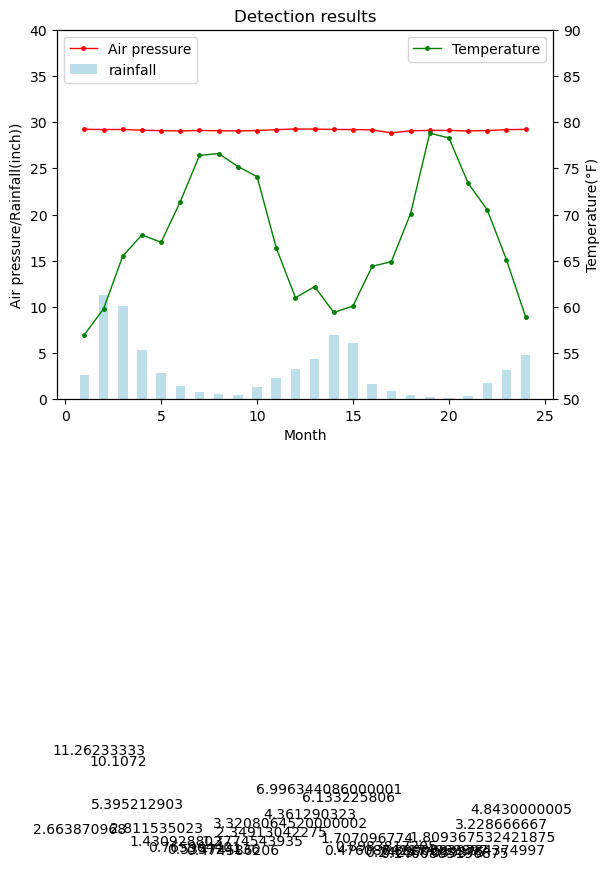

In [21]:
# 绘柱状图
plt.plot(month, air_pressure_list, 'r', marker='.', c='r', ms=5, linewidth='1', label="Air pressure")
figure = plt.bar(x=month, height=rainfall_list, label='rainfall', color='lightblue', alpha=0.8, width=0.5)
plt.ylim(0, 40)
# 在左侧显示图例
plt.legend(loc="upper left")
# 设置标题
plt.title("Detection results")
# 为两条坐标轴设置名称
plt.xlabel("Month")
plt.ylabel("Air pressure/Rainfall(inch))")

# 画折线图
ax2 = plt.twinx()
ax2.set_ylabel("Temperature(°F)")
ax2.set_ylim(50, 90)
# 设置坐标轴范围
plt.plot(month, temperature_list, "r", marker='.', c='g', ms=5, linewidth='1', label="Temperature")
# 显示数字
for fig in figure:
    ax2.text(fig.get_x(), fig.get_height(), fig.get_height(), ha='center', va='bottom', fontsize=10)
    
    plt.legend(loc="upper right")
plt.show()

In [22]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
rainfall_list, temperature_list, air_pressure_list = np.array(rainfall_list), np.array(temperature_list), np.array(air_pressure_list)

/var/folders/hs/hk_yx7yd6g1dvcsdd3rksqk40000gn/T/ipykernel_19867/4159041361.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(1.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(month, prediction, 'r', marker='.', c='r', ms=5, linewidth='1', label="Prediction")
/var/folders/hs/hk_yx7yd6g1dvcsdd3rksqk40000gn/T/ipykernel_19867/4159041361.py:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(1.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(month, soil_moisture, 'r', marker='.', c='g', ms=5, linewidth='1', label="Soil moisture")


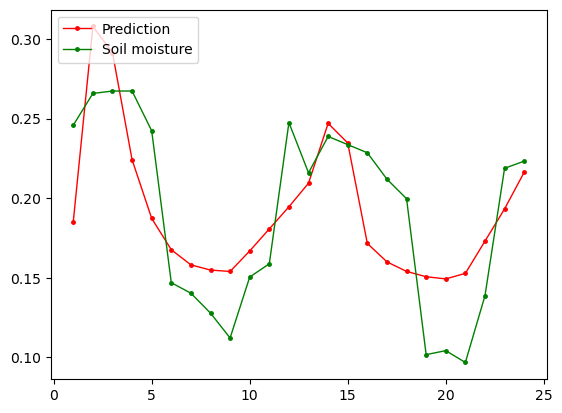

[0.01426728] 0.14715905345465793


In [23]:
from sklearn import linear_model
model = linear_model.LinearRegression()
df_train = pd.DataFrame({'rainfall': rainfall_list , 'temperature': np.log(temperature_list), 'soil_moisture': soil_moisture})
model.fit(df_train[['rainfall']], df_train['soil_moisture'])
prediction = model.predict(df_train[['rainfall']])
plt.plot(month, prediction, 'r', marker='.', c='r', ms=5, linewidth='1', label="Prediction")
plt.plot(month, soil_moisture, 'r', marker='.', c='g', ms=5, linewidth='1', label="Soil moisture")
plt.legend(loc="upper left")
plt.show()
print(model.coef_, model.intercept_)